 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [51]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [52]:
# Reading whale returns
whalepath = Path("Resources/whale_returns.csv")

# Set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whalepath, index_col="Date",infer_datetime_format=True,parse_dates=True)

# Preview Data
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [53]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [54]:
# Drop nulls
whale_df = whale_df.dropna()

# Confirm nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [55]:
# Reading algorithmic returns
algopath = Path("Resources/algo_returns.csv")

# Set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algopath, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Preview Data
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [56]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [57]:
# Drop nulls
algo_df = algo_df.dropna()

# Confirm nulls dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [58]:
# Reading S&P 500 Closing Prices
sp500path = Path("Resources/sp500_history.csv")

# Set the `date` column as a datetime index to the DataFrame
sp500_df = pd.read_csv(sp500path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Preview Data
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [59]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
# Clean identified numeric fields with $ symbol and convert `Close` from `object` to `float`
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")

# Recheck Data Types (Close changed to Float)
sp500_df.dtypes

C:\Users\dspin\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [61]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [62]:
# Drop nulls, first entry should be removed
sp500_df = sp500_df.dropna()
sp500_df.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [63]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_df.head()

,S&P 500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [64]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_return = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Portfolio Returns'}, xlabel='Date'>

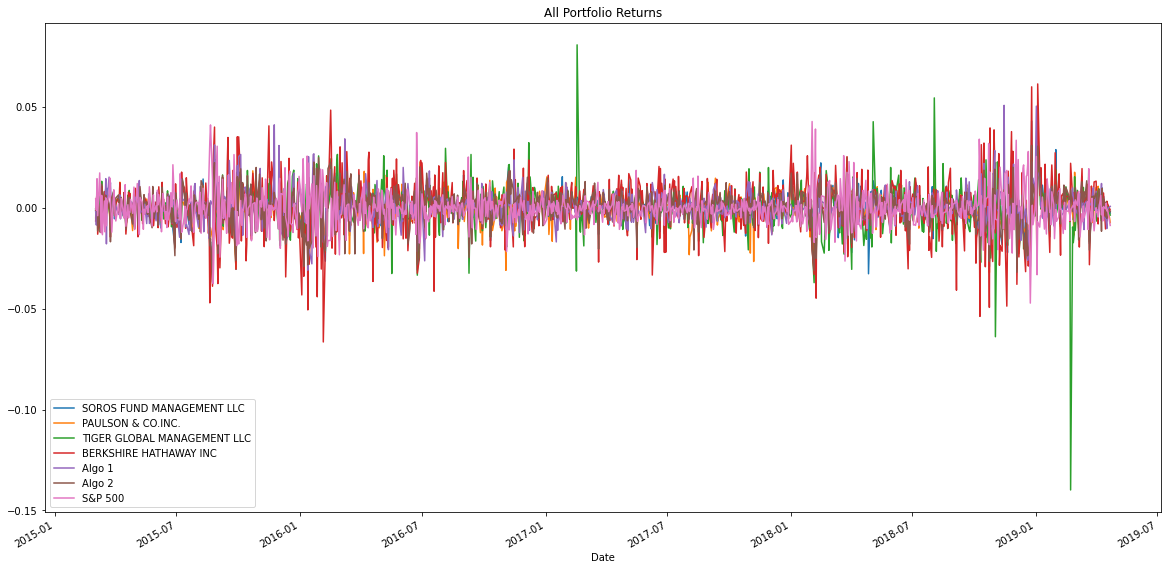

In [65]:
# Plot daily returns of all portfolios
combined_return.plot(title='All Portfolio Returns',figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

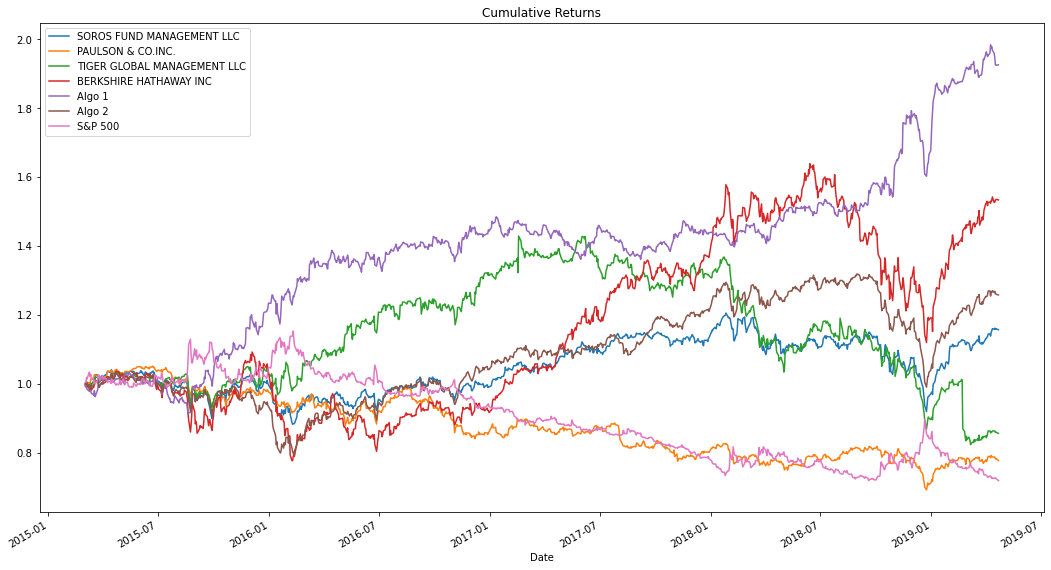

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_return).cumprod()
# print(cumulative_returns.tail())

# Plot cumulative returns
cumulative_returns = cumulative_returns.plot(title = 'Cumulative Returns', figsize=(18,10))
cumulative_returns 


---

* Since Jan 2017 the S&P has been outperformed by most portfolios, with Paulson and Co returns largely appearing to be coorelated with the S&P 500.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

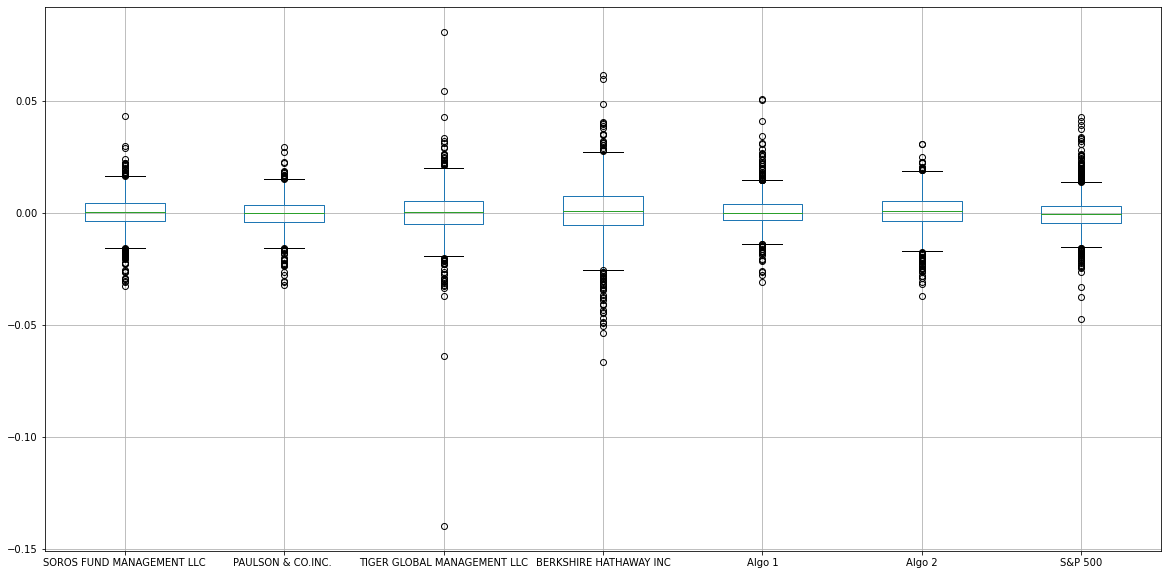

In [67]:
# Box plot to visually show risk
combined_return.boxplot(figsize=(20,10))

* Tiger global historically has has a widest range in returns.

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(combined_return.std()).rename(columns = {0:"Daily Standard Deviation"})
df_daily_std

,Daily Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
S&P 500,0.008587


### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate the daily standard deviation of S&P 500
SP500_Std = combined_return['S&P 500'].std()
SP500_Std

0.00858688974707399

In [70]:
# Determine which portfolios are riskier than the S&P 500p
print("The following portfolios below are riskier than the S&P 500:")
higher_std = df_daily_std[df_daily_std["Daily Standard Deviation"] > df_daily_std.loc["S&P 500", "Daily Standard Deviation"]]
higher_std

The following portfolios below are riskier than the S&P 500:


,Daily Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [71]:
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std
df_annualized_std.rename(columns={'Daily Standard Deviation': 'Annualized Standard Deviation'})

,Annualized Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
S&P 500,0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

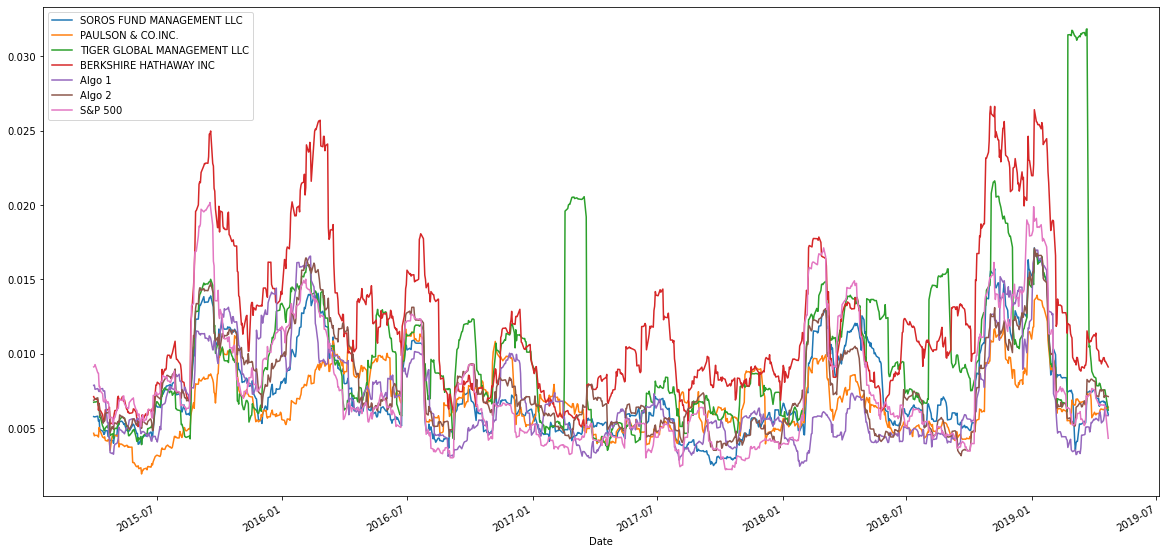

In [72]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_return.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [73]:
# Calculate the correlation and display
correlation = combined_return.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

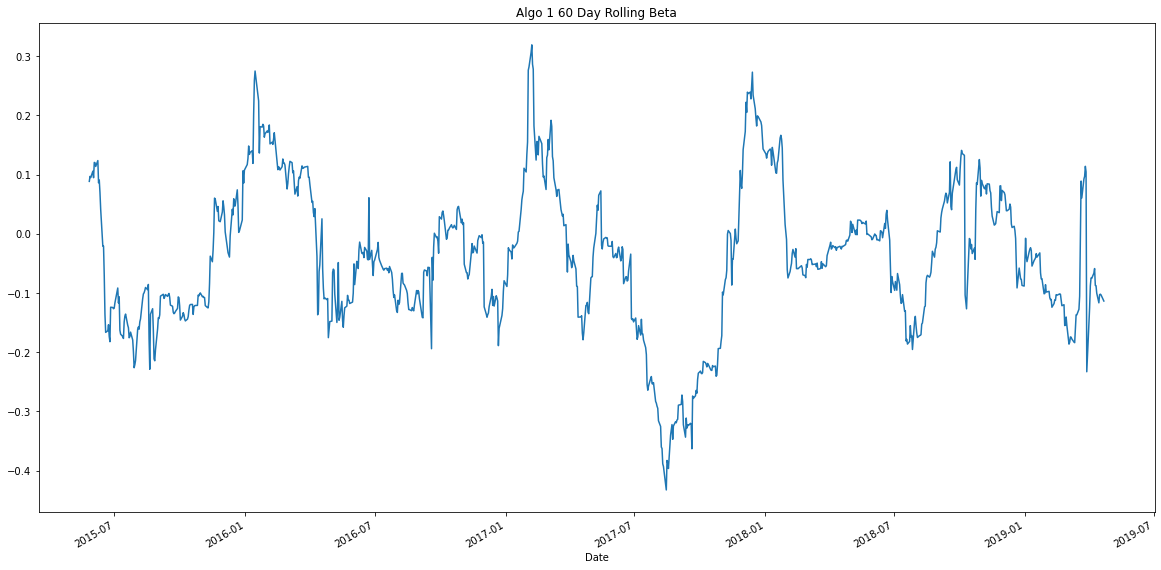

In [74]:
# Calculate covariance of a single portfolio
covariance = combined_return['Algo 1'].rolling(window=60).cov(combined_return['S&P 500'])

# Calculate variance of S&P 500
variance = combined_return['S&P 500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend

beta_plot = beta.plot(title="Algo 1 60 Day Rolling Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

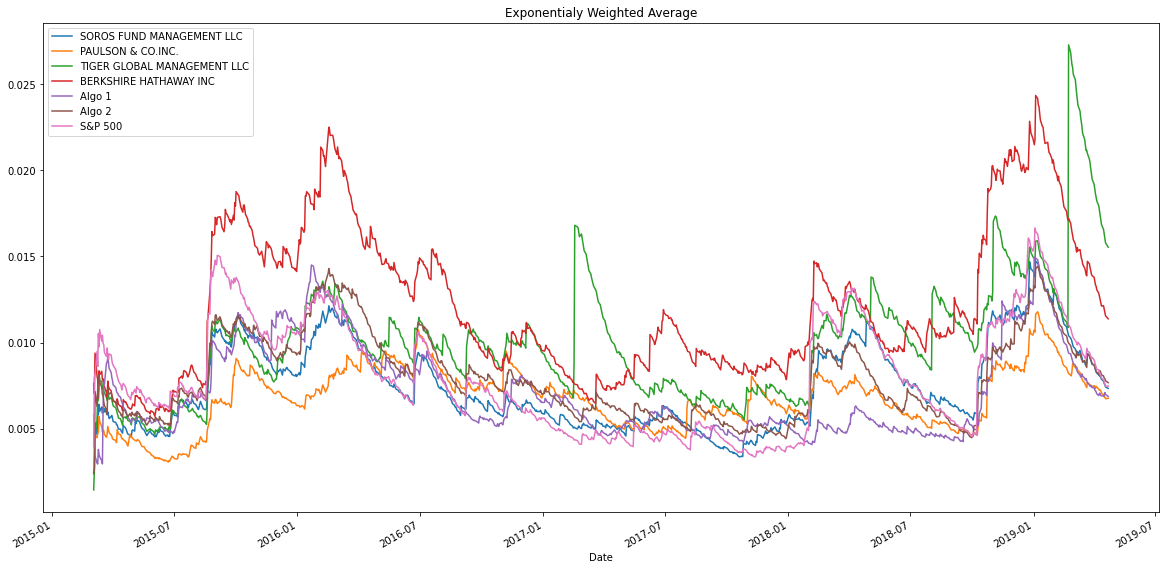

In [75]:
# Use `ewm` to calculate the rolling window
combined_return.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_return.mean()* 252) / (combined_return.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending = False)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

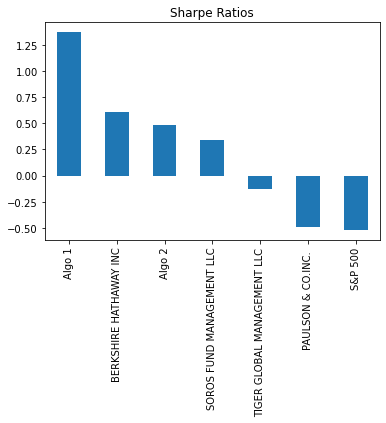

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

* Algo 1 outperforms the S&P 500 and the whales portfolios. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [78]:
# Reading data from 1st stock
dxcm = Path("C:/Users/dspin/ClassRepository/RUT-VIRT-FIN-PT-11-2021-U-C/Homework/Pandas/Resources/DXCM.csv")
dxcm_df = pd.read_csv(dxcm, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Drop unneeded columns
dxcm_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

dxcm_df.rename(columns={'Close': 'dxcm'}, inplace=True)

#Check nulls
dxcm_df.isnull().sum()

dxcm    0
dtype: int64

In [79]:
# Preview Data
dxcm_df.head()

,dxcm
Date,
2005-04-14,11.74
2005-04-15,10.25
2005-04-18,10.50
2005-04-19,10.58
2005-04-20,10.60


In [80]:
# Reading data from 2nd stock
lng = Path("C:/Users/dspin/ClassRepository/RUT-VIRT-FIN-PT-11-2021-U-C/Homework/Pandas/Resources/LNG.csv")
lng_df = pd.read_csv(lng, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Drop unneeded columns
lng_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

lng_df.rename(columns={'Close': 'lng'}, inplace=True)

# Check nulls
lng_df.isnull().sum()

lng    0
dtype: int64

In [81]:
# Preview Data
lng_df.head()

,lng
Date,
2000-03-01,2.250
2000-03-02,2.312
2000-03-03,2.312
2000-03-06,2.500
2000-03-07,2.376


In [82]:
# Reading data from 3rd stock
tdg = Path("C:/Users/dspin/ClassRepository/RUT-VIRT-FIN-PT-11-2021-U-C/Homework/Pandas/Resources/TDG.csv")
tdg_df = pd.read_csv(tdg, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Drop unneeded columns
tdg_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

# Rename Columns
tdg_df.rename(columns={'Close': 'tdg'}, inplace=True)

# Check nulls
tdg_df.isnull().sum()

tdg    0
dtype: int64

In [83]:
# Preview Data
tdg_df.head()

,tdg
Date,
2006-03-15,24.100000
2006-03-16,24.270000
2006-03-17,25.010000
2006-03-20,24.900000
2006-03-21,24.200001


In [84]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([dxcm_df, lng_df, tdg_df], axis="columns", join="inner")
combined_df.head()

,dxcm,lng,tdg
Date,,,
2006-03-15,20.799999,39.689999,24.100000
2006-03-16,20.049999,39.660000,24.270000
2006-03-17,19.280001,39.419998,25.010000
2006-03-20,18.440001,38.599998,24.900000
2006-03-21,18.490000,37.869999,24.200001


In [85]:
# Reset the index
combined_df.index = combined_df.index.normalize()
combined_df

,dxcm,lng,tdg
Date,,,
2006-03-15,20.799999,39.689999,24.100000
2006-03-16,20.049999,39.660000,24.270000
2006-03-17,19.280001,39.419998,25.010000
2006-03-20,18.440001,38.599998,24.900000
2006-03-21,18.490000,37.869999,24.200001
...,...,...,...
2021-12-06,524.429993,105.370003,601.619995
2021-12-07,558.400024,106.559998,603.359985
2021-12-08,564.849976,105.480003,612.570007


In [86]:
# Calculate daily returns
combined_daily_returns = combined_df.pct_change()

# Drop NAs
combined_daily_returns = combined_daily_returns.dropna()

# Display sample data
combined_daily_returns

,dxcm,lng,tdg
Date,,,
2006-03-16,-0.036058,-0.000756,0.007054
2006-03-17,-0.038404,-0.006051,0.030490
2006-03-20,-0.043568,-0.020802,-0.004398
2006-03-21,0.002711,-0.018912,-0.028112
2006-03-22,0.009194,0.004753,-0.001653
...,...,...,...
2021-12-06,0.009509,0.017969,0.030348
2021-12-07,0.064775,0.011293,0.002892
2021-12-08,0.011551,-0.010135,0.015265


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combined_daily_returns.dot(weights)

# Display sample data
weighted_returns = weighted_returns.rename("Random Portfolio")
weighted_returns.head()

Date
2006-03-16   -0.009920
2006-03-17   -0.004655
2006-03-20   -0.022923
2006-03-21   -0.014771
2006-03-22    0.004098
Name: Random Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([combined_return,weighted_returns], axis='columns', join='inner')
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Random Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.001379
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.011151
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003660
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.015098
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.000633


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios = combined_portfolios.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`
df_annualized_std = combined_portfolios.std()*np.sqrt(252)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
Random Portfolio               0.251321
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

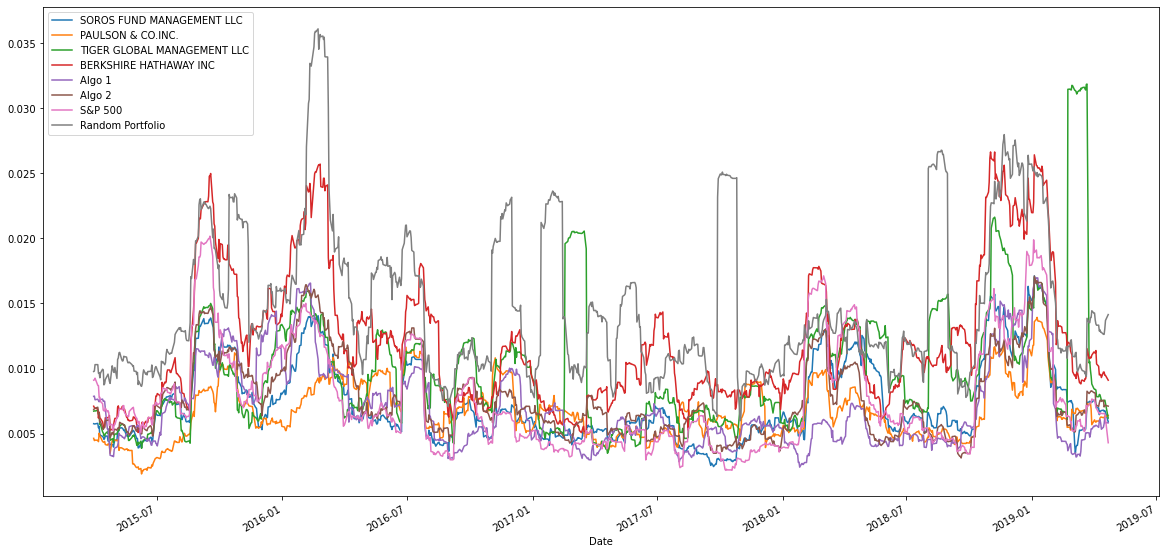

In [91]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolios.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

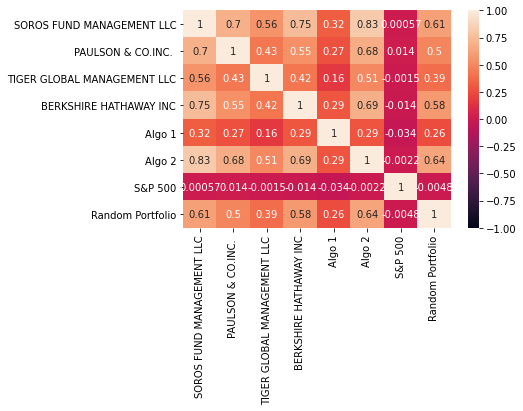

In [92]:
# Calculate and plot the correlation
correlation = combined_portfolios.corr()
# Incorperated Display the correlation matrix
correlation
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

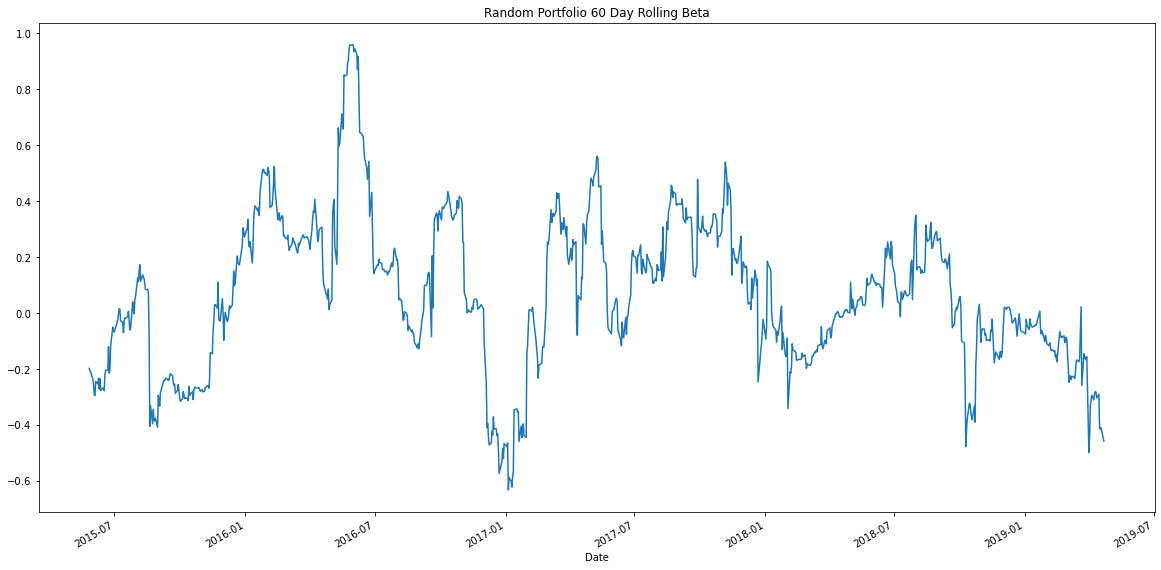

In [93]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = combined_portfolios['Random Portfolio'].rolling(window=60).cov(combined_portfolios['S&P 500'])

# Calculate variance of S&P 500
variance = combined_portfolios['S&P 500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend

beta_plot = beta.plot(title="Random Portfolio 60 Day Rolling Beta", figsize=(20, 10))

* The rolling 60 day beta has not exceeded 1 since 2015 indicating it may be considered less volatile than the overall market.

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [94]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios.mean()* 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending = False)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

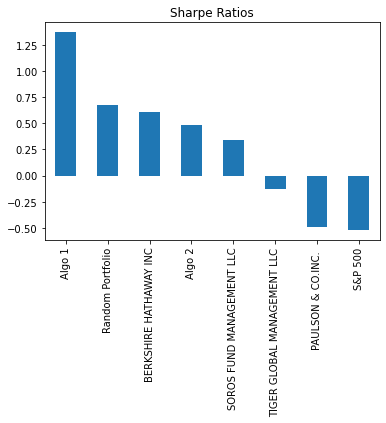

In [95]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

* My randomly created portfolio is outperformed only by Algo 1.